**Course:** Advanced Algorithms by Dr. Zarei

**Homework:** HW3

**Name:** Mohammad Mohammadi

**Student ID:** 402208592

# Question 1
An n x n grid is an undirected graph consisting of n rows and n columns of vertices, as shown in Figure 26.11. We denote the vertex in the ith row and the jth column by (i, j). Allvertices in a grid have exactly four neighbors, except for the boundary vertices, which are the points (i, j) for which i = 1, i = n, j = 1, or j = n. Givenm ≤ nଶ starting points (x1, y1), (x2, y2), …, (xm, ym ) in the grid, the escape problem is to determine whether or not there are m vertex-disjoint paths from the starting points to any m different points on the boundary. For example, the grid in Figure 1(a) has an escape, but the grid in Figure 1(b) does not.

a. Consider a flow network in which vertices, as well as edges, have capacities. That is, the total positive flow entering any given vertex is subject to a capacity constraint. Show that determining the maximum flow in a network with edge and vertex capacities can be reduced to an ordinary maximum-flow problem on a flow network of comparable size.

b. Describe an efficient algorithm to solve the escape problem, and analyze its running time.


## Answer 1

### Part a.

**Transformation into a Flow Network:**

Objective: Transform the given grid into a flow network to use maximum flow algorithms. Each cell in the grid represents a node in the network, and each connection between adjacent cells represents an edge.

Steps:

1.  Create Nodes:

For every cell in the grid, create a node in the flow network.
Label each node corresponding to its position in the grid, e.g., node (i,j) for the cell at row i and column j.

2.  Establish Edges:

For each pair of adjacent cells in the grid, create a directed edge in both directions between the corresponding nodes in the flow network.
Assign a capacity of 1 to each edge, indicating that each path can only use this edge once, which aligns with the requirement for vertex-disjoint paths.

3.  Add Source and Sink:

Introduce a super-source node s and create an edge from s to each of the m starting nodes with a capacity of 1.
Introduce a super-sink node t and create an edge from each boundary node to t with a capacity of 1.

4.  Handle Boundary Nodes:

Boundary nodes naturally have fewer edges connecting to them in the flow network, representing their fewer neighbors in the grid.

5.  Manage Internal Nodes:

Internal nodes have edges to four neighbors, except for those next to the boundary. The capacity constraints ensure these nodes can only be part of one path.

6.  Set Edge Capacities:

All edge capacities are set to 1 to ensure no two paths can use the same edge, guaranteeing the paths are vertex-disjoint.


**Applying Maximum Flow:**

After the transformation, use a maximum flow algorithm like Ford-Fulkerson, Edmonds-Karp, to find the maximum flow from s to t. If the maximum flow value is m, there are enough disjoint paths for all starting points to escape. The flow through an edge indicates the path taken.

1.  Interpreting Results:
    *  Maximum Flow Value: If it equals m, all starting points can escape.
    *  Flow Paths: Tracing the flow from t to s reconstructs the paths.

2.  Complexity Considerations:
    *   The complexity depends on the algorithm, e.g., Edmonds-Karp runs in O(VE^2), suitable for a grid graph where E is proportional to 4V, leading to O(V^3).


This transformation enables the application of maximum flow algorithms to solve the escape problem efficiently. Performance may vary with the grid structure and starting point distribution.


### Part b.

**Describe an Efficient Algorithm:**

1.  Algorithm Selection:
    *   Choose an efficient maximum flow algorithm, like the Edmonds-Karp algorithm, which applies the Ford-Fulkerson method and uses breadth-first search to find the shortest augmenting paths. This algorithm is preferred for its polynomial runtime complexity.

2.  Graph Representation:
    *   Represent the grid as a graph, G(V, E), where each vertex in V corresponds to a cell in the grid, and each edge in E represents a possible path between two adjacent cells.

3.  Source and Sink Creation:
    *   Add a super-source node and connect it to each of the m starting vertices with edges of capacity 1.
    *   Add a super-sink node and connect every boundary vertex to it with edges of capacity 1.

4.  Algorithm Implementation:
    *   Implement the Edmonds-Karp algorithm, which involves repeatedly finding the shortest augmenting path from the source to the sink and increasing the flow along this path until no more augmenting paths can be found.

5.  Path Reconstruction:
    *   After the maximum flow is found, reconstruct the actual paths from the flow network. For each unit of flow from the source to a starting vertex, trace the path it takes to reach the boundary, ensuring to follow edges with flow.

6.  Augmenting Path Search:
    *   During the algorithm, use a breadth-first search to ensure the shortest paths are augmented first, which optimizes the number of paths found and the runtime of the algorithm.

7.  Termination:
    *   The algorithm terminates when no more augmenting paths from the source to the sink can be found, which means the maximum flow in the network has been reached.

8.  Runtime Analysis:
    *   The Edmonds-Karp algorithm runs in O(V*E^2) time. Since each cell in the grid corresponds to a vertex and each cell has at most 4 adjacent cells, the total number of edges is on the order of the number of vertices, leading to a polynomial-time solution of O(V^3).

9.  Efficiency Considerations:
    *   While Edmonds-Karp has a good average-case performance, in practice, for larger grids or specific types of graphs, more efficient algorithms like Dinic's algorithm or push-relabel can be used, which have better theoretical worst-case time complexities.

10. Verification:
    *   After execution, verify the maximum flow equals the number of starting points, m. If so, an escape is possible for all individuals. Otherwise, it is not possible for all m starting points to escape.

This algorithm provides an efficient solution to the escape problem by leveraging the Edmonds-Karp algorithm's capability to find the maximum flow in a network, thereby determining the maximum number of disjoint escape paths from the given starting points to the boundary.

# Question 2

A path cover of a directed graph G = (V, E) is a set P of vertex-disjoint paths such that every vertex in V is included in exactly one path in P. Paths may start and end anywhere, and they may be of any length, including 0. A minimum path cover of G is a path cover containing the fewest possible paths.

a. Give an efficient algorithm to find a minimum path cover of a directed acyclic graph G = (V, E). (Hint: Assuming that V = {1,2,...,n}, construct the graph G' = (V',E'), where

V' = {x0,x1,...,xn} U {y0,y1,...,yn},
E' = {(x0,xi) : i ∈ V} U {(yi,y0) : i ∈ V} U {(xi, yj) : (i, j) ∈ E},

and run a maximum-flow algorithm.)

b. Does your algorithm work for directed graphs that contain cycles? Explain.

## Answer 2

### Part a. Efficient Algorithm for Directed Acyclic Graph

1.  **Graph Transformation:**
    *   Given a DAG G = (V, E) with vertices V = {1, 2, ..., n}, transform it into a bipartite graph G' = (V', E').
    *   Create two sets of vertices in G':
        *   X = {x1, x2, ..., xn} corresponding to the original vertices.
        *   Y = {y1, y2, ..., yn} also corresponding to the original vertices.
    *   For each edge (i, j) in E of the original DAG, add an edge (xi, yj) in G'.
    *   Add two new vertices: a source vertex s and a sink vertex t.
    *   Connect the source s to all vertices in X and all vertices in Y to the sink t.

2.  **Maximum Flow:**
    *   Assign each edge in G' a capacity of 1.
    *   Run a maximum flow algorithm (like Ford-Fulkerson or Edmonds-Karp) from s to t in G'.

3.  **Interpreting the Result:**
    *   The maximum number of vertex-disjoint paths in G corresponds to the value of the maximum flow in G'.
    *   Each flow path from s to t in G' (excluding s and t) corresponds to a path in the original DAG G.

4.  **Minimum Path Cover:**
    *   The minimum number of paths needed to cover all vertices in G is the maximum flow value in G'.
    *   The question is, why does maximizing the number of disjoint paths in G' minimize the number of paths in the path cover of G? Here's the reasoning:
        *   If there is a way to cover all vertices of G with fewer paths, it means we could have a flow in G' that uses fewer paths but still covers all vertices. However, this contradicts the principle of maximum flow, which by its nature will find the most extensive use of the network's capacity.
        *   Therefore, the maximum number of disjoint paths (maximum flow) we find is actually the smallest number of paths that can cover all vertices of G because any reduction in this number would leave some vertices uncovered.
    *   **Max Flow = Min Path Cover:** So, when we say "maximizing the flow in G' " and thereby "finding the greatest number of vertex-disjoint paths in G", we are essentially finding the smallest set of such paths that can cover all vertices in G. This set is the minimum path cover.

### part b. Check for Applicability to Graphs with Cycles

The algorithm is specifically for Directed Acyclic Graphs (DAGs) and may not work correctly for graphs with cycles because:

1.  **Path Definition:** In a DAG, paths are well-defined with clear start and end points, without the risk of looping. This is crucial for transforming into a bipartite graph where each path in the DAG corresponds to a unique flow in the transformed graph.

2.  **Cycles in Graphs:** In graphs with cycles, defining a path becomes more complex, especially covering vertices with disjoint paths. The same vertex can be revisited in different cycles, complicating the transformation and flow algorithm application.

3.  **Algorithm Modification:** For graphs with cycles, additional steps or a different approach might be needed to account for revisiting vertices.

In conclusion, the algorithm works efficiently for DAGs using their acyclic nature to find a minimum path cover via a flow network transformation and a maximum flow algorithm. However, it may not be directly applicable to graphs with cycles, requiring a different strategy.

# Question 3

Professor Gore wants to open up an algorithmic consulting company. He has identified n important subareas of algorithms (roughly corresponding to different portions of this textbook), which he represents by the set A = {A1, A2, ..., An}. In each subarea Ak, he can hire an expert in that area for ck dollars. The consulting company has lined up a set J = {J1, J2, ..., Jm} of potential jobs. In order to perform job Ji, the company needs to have hired experts in a subset Ri ⊆ A of subareas. Each expert can work on multiple jobs simultaneously. If the company chooses to accept job Ji, it must have hired experts in all subareas in Ri, and it will take in revenue of pi dollars.

Professor Gore's job is to determine which subareas to hire experts in and which jobs to accept or reject to maximize the net revenue, which is the total income from jobs accepted minus the total cost of employing the experts.

Consider the following flow network G. In it contains a source vertex s, vertices A1, A2, ..., An, vertices J1, J2, ..., Jm, and a sink vertex t. For k = 1, 2, ..., n, the flow network contains an edge (s, Ak) with capacity c(s, Ak) = ck. For i = 1, 2, ..., m, the flow network contains an edge (Ji, t) with capacity c(Ji, t) = pi. For k = 1, 2, ..., n, and i = 1, 2, ..., m, if Ak ∈ Ri, then G contains an edge (Ak, Ji) with capacity c(Ak, Ji) = ∞.

a. Show that if Ji ∈ T for a finite-capacity cut (S, T) of G, then Ak ∈ T for each Ak ∈ Ri.

b. Show how to determine the maximum net revenue from the capacity of a minimum cut of G and the given pi values.

c. Give an efficient algorithm to determine which jobs to accept and which experts to hire. Analyze the running time of your algorithm in terms of m, n, and r = Σ(from i=1 to m) |Ri|.

## Answer 3

### Part a.

To show that if job Ji is in the set T of a finite-capacity cut (S, T) of the flow network G, then every subarea Ak that is required for job Ji must also be in T.

In a flow network, a cut (S, T) partitions the vertices into two disjoint subsets where the source s is in S and the sink t is in T. The capacity of the cut is the sum of the capacities of all the edges going from S to T.

Since we have an edge from Ak to Ji with infinite capacity, if Ak were not in T, then this edge would cross the cut from S to T, and since it has infinite capacity, the capacity of the cut would be infinite, which contradicts the definition of a finite-capacity cut.

Therefore, if Ji is in T, all the edges (Ak, Ji) must not cross the cut, which means all the Ak's must also be in T. This ensures that the cut capacity remains finite.

### Part b.

To determine the maximum net revenue, we are essentially looking for a cut in the flow network that minimizes the sum of the capacities of the edges going from S to T, which is equivalent to minimizing the costs of hiring experts (represented by edges (s, Ak) with capacity ck) and maximizing the revenue from jobs (represented by edges (Ji, t) with capacity pi).

The capacity of the minimum cut corresponds to the maximum flow in the network by the Max-Flow Min-Cut Theorem. The maximum net revenue can be found by:

Computing the maximum flow in the network.
Determining the minimum cut from the residual graph after the maximum flow is found.
Summing the pi values for all jobs Ji that are in T and subtracting the ck values for all subareas Ak that are in S.
The maximum net revenue is the total revenue from jobs in T minus the total cost of hiring experts in S.

### Part c.

For an efficient algorithm:

1.  Use an algorithm like the Ford-Fulkerson method or Edmonds-Karp algorithm to find the maximum flow in the network.
2.  Once the maximum flow is found, identify the minimum cut.
3.  The set of jobs to accept corresponds to the set of job vertices in T.
4.  The set of experts to hire corresponds to the set of subarea vertices not in T (since they are connected to the source s).

To analyze the running time:

*   The Ford-Fulkerson algorithm runs in O(Ef) time, where E is the number of edges and f is the maximum flow in the network.
*   Since the capacities are integers, Edmonds-Karp, a specific implementation of Ford-Fulkerson, runs in O(VE^2) time where V is the number of vertices.
*   In the context of this problem, we have V = n + m + 2 (including s and t) and E = n + m + r, where r is the sum of the sizes of all Ri sets.
*   Therefore, the running time will be O((n + m + 2)(n + m + r)^2), simplifying to O((n + m)(n + m + r)^2) considering large values of n, m, and r.


This algorithm will efficiently determine which jobs to accept and which experts to hire to maximize the net revenue for Professor Gore's consulting company.

# Question 4

Suppose that we have one machine and a set of n tasks a1, a2, ..., an, each of which requires time on the machine. Each task aj requires tj time units on the machine (its processing time), yields a profit of pj, and has a deadline dj. The machine can process only one task at a time, and task aj must run without interruption for tj consecutive time units. If we complete task aj by its deadline dj, we receive a profit pj, but if we complete it after its deadline, we receive no profit. As an optimization problem, we are given the processing times, profits, and deadlines for a set of n tasks, and we wish to find a schedule that completes all the tasks and returns the greatest amount of profit. The processing times, profits, and deadlines are all nonnegative numbers.

a. State this problem as a decision problem.

b. Show that the decision problem is NP-complete.

c. Give a polynomial-time algorithm for the decision problem, assuming that all processing times are integers from 1 to n. (Hint: Use dynamic programming.)

d. Give a polynomial-time algorithm for the optimization problem, assuming that all processing times are integers from 1 to n.

## Answer 4

### Part a. State this problem as a decision problem.

To state the given optimization problem as a decision problem, we need to phrase it in a way that the answer is either "yes" or "no." For this scheduling problem, the decision problem can be framed as follows:

"Is there a schedule for the given set of tasks on a single machine, such that each task is completed by its deadline and the total profit earned is at least P?"

Here P is a specified profit threshold. The inputs to this decision problem would be the set of tasks with their processing times, profits, and deadlines, along with the profit threshold P.

### Part b. Show that the decision problem is NP-complete.

To show that a decision problem is NP-complete, we must prove that it is in NP (nondeterministic polynomial time) and that it is as hard as any other problem in NP (this is usually done by reducing a known NP-complete problem to the problem at hand).

*   **In NP:** A problem is in NP if a "yes" solution can be verified in polynomial time. For our scheduling problem, given a schedule, we can verify in polynomial time whether all tasks are completed by their deadlines and whether the total profit is at least P by simply simulating the schedule.

**Proving the Problem is in NP**

To prove that a decision problem is in NP (Non-deterministic Polynomial time), we must demonstrate that a "yes" instance of the problem (where the answer is affirmative) can be verified quickly, in polynomial time. For our scheduling problem, the verification would involve checking a given schedule to see if all tasks meet their deadlines and if the total profit meets or exceeds the profit threshold P. Here's how this verification process would work:

Schedule Verification: Given a schedule that lists the order and start time for each task, we can check if each task starts and finishes without overlap with other tasks and within its allocated processing time.

Deadline Verification: For each task in the schedule, we can verify whether the task is completed by its deadline, which is simply checking if the start time plus processing time is less than or equal to the deadline.

Profit Calculation: We sum the profits for all tasks completed by their deadlines and check if this sum is at least P.

Polynomial Time: All these checks involve basic arithmetic operations and comparisons for each task, which can be done in linear time with respect to the number of tasks. Thus, the verification can be performed in polynomial time, which confirms that our decision problem is in NP.

*   **NP-hard:** To show that the problem is NP-hard, we typically reduce a known NP-complete problem to it. One common approach is to reduce from the Partition problem or the Knapsack problem. For example, we can create a task for each item in the Knapsack problem with the weight representing the processing time and the value representing the profit, and set the deadline such that it would force an optimal solution to the Knapsack problem to correspond to a schedule that meets the required profit threshold.

**Proving the Problem is NP-Hard**

Showing that a problem is NP-hard involves proving that every problem in NP can be reduced to it in polynomial time. This is usually done by taking a known NP-complete problem and showing that it can be transformed into an instance of our problem in polynomial time. If we can solve our problem in polynomial time, then we could solve the known NP-complete problem in polynomial time, too.

Reduction from a Known NP-Complete Problem: We could take a well-known NP-complete problem like the Knapsack problem or the 3-Partition problem and show how it can be reduced to our scheduling problem. Let's use the 3-Partition problem as an example.

3-Partition Problem: This problem involves dividing a set of 3m integers into m triplets, such that the sum of the numbers in each triplet is equal. This problem is known to be NP-complete.

Transformation Process: We can transform an instance of the 3-Partition problem into our scheduling problem by assigning each integer to a task where the integer value represents both the processing time and the profit of the task. We can then set the deadlines in such a way that the only way to achieve a certain profit within these deadlines is to find the perfect triplets, just like in the 3-Partition problem.

Proof of Correctness: We need to demonstrate that this transformation maintains the properties of the original problem, meaning that a solution to the new problem corresponds directly to a solution to the 3-Partition problem.

Polynomial Time: The transformation process should be achievable in polynomial time, which generally involves constructing the instances of our problem using the numbers given in the 3-Partition problem. Since the tasks are created directly from the integers and the deadlines can be set based on the sum required for the triplets, this process is polynomial with respect to the size of the input.

By completing this reduction, we show that if we had a polynomial-time algorithm for our scheduling problem, we could solve the 3-Partition problem in polynomial time as well. Since the 3-Partition problem is NP-complete, this would imply that our problem is at least as hard as the hardest problems in NP, making it NP-hard.

With both parts established, our decision problem is both in NP and NP-hard, and thus it is NP-complete.


### Part c. Give a polynomial-time algorithm for the decision problem, assuming that all processing times are integers from 1 to n.

A dynamic programming approach can be used to solve the decision problem in polynomial time when the processing times are integers from 1 to n.

1.  Dynamic Programming Table: Construct a DP table where DP[i][j] represents the maximum profit that can be obtained by scheduling tasks up to the ith task and using exactly j time units.
2.  Base Cases: Set DP[0][j] = 0 for all j, since no tasks have been scheduled.
3.  Recursive Relation: For each task i and time j, the DP relation can be:
    *   If j < ti (processing time of task i), then DP[i][j] = DP[i-1][j] (we cannot schedule the task).
    *   If j >= ti, then DP[i][j] = max(DP[i-1][j], DP[i-1][j-ti] + pi if j <= di or 0 otherwise). This means we take the maximum of not taking task i or taking task i if the deadline allows.
4.  Reconstruction: After filling in the table, reconstruct the solution to find the schedule.

### Part d. Give a polynomial-time algorithm for the optimization problem, assuming that all processing times are integers from 1 to n.
The optimization problem can also be solved with a dynamic programming approach, using a similar table as described in part c.

1.  Sort Tasks: Sort the tasks based on their deadlines.
2.  Dynamic Programming Table: Construct a DP table where DP[i][j] represents the maximum profit that can be obtained by scheduling tasks up to the ith task by time j.
3.  Base Cases: Initialize DP[0][j] = 0 for all j.
4.  Recursive Relation: For each task i and time j, the DP relation can be updated similarly to part c, considering the profit and deadlines.
5.  Iterate over Table: Fill in the DP table iteratively considering each task and time slot.
6.  Find Maximum Profit: The maximum value in the last row of the DP table will give the maximum profit that can be earned.

The time complexity of this approach is O(n^2) because we have n tasks and n time units, resulting in n^2 entries in our DP table. Each entry is computed in constant time, assuming that the tasks are sorted initially, which can be done in O(n log n) time.

# Question 5

A boolean formula in exclusive-or conjunctive normal form (XCNF) is a conjunction (AND) of several clauses, each of which is the exclusive-or of one or more literals. For example:

$(u \oplus v \oplus w \oplus x) \land (\overline{u} \oplus w \oplus y) \land (\overline{i} \oplus v \oplus y) \land (\overline{u} \oplus \overline{i} \oplus v \oplus x \oplus y) \land (w \oplus x) \land y
$

The XCNF-SAT problem asks whether a given XCNF boolean formula is satisfiable. Either describe a polynomial-time algorithm for XCNF-SAT or prove that it is NP-complete.

## Answer 5

XCNF-SAT can be solved in polynomial time. In order to satisfy a clause, the binary sum of the literals inside must be 1 (mod 2), since a exclusive-or clause is satisfied if and only
if there is odd number of true literals. Hence, we can construct a system of linear equation
over modulo 2. For each clause, an equation will be constructed. The left hand side contains
the sum of the variables. If a literal is the negation of some variable x, we transformed it
into x +1 in the equation; The right hand side is 1 (mod 2). For example, for the clause:

$u \oplus v \oplus \overline{w} \oplus x$

We can transform it into:

u + v + w + 1 + x ≡ 1 (mod 2)

By using Gaussian Elimination method for binary arithmetic, we can solve this system and obtain the satisfying assignments. It takes linear time to scan the boolean formula and construct the linear system. Given a XCNF-SAT instance that contains m clauses and n variables, Gaussian Elimination for binary arithmetic takes O(mn²) time. Hence, our algorithm runs in polynomial-time.


# Question 6

Let G be an undirected graph with weighted edges. A heavy Hamiltonian cycle is a cycle C that passes through each vertex of G exactly once, such that the total weight of the edges in C is at least half of the total weight of all edges in G. Prove that deciding whether a graph has a heavy Hamiltonian cycle is NP-complete.



## Answer 6

We reduce from Hamiltonian Path problem. Given a graph G = (V, E), we add two vertices s and t that connects all v in V , respectively. Also s and t is connected. Then we get a graph G' =
(V' , E'), where V' = V ∪ {s, t} and E' = E ∪ {(s, t)} ∪ {(s, v), (t, v) | v ∈ V }. We assign a weight |E| + 2|V | to (s, t), and 1 to all other edges. An illustration is given as follows:

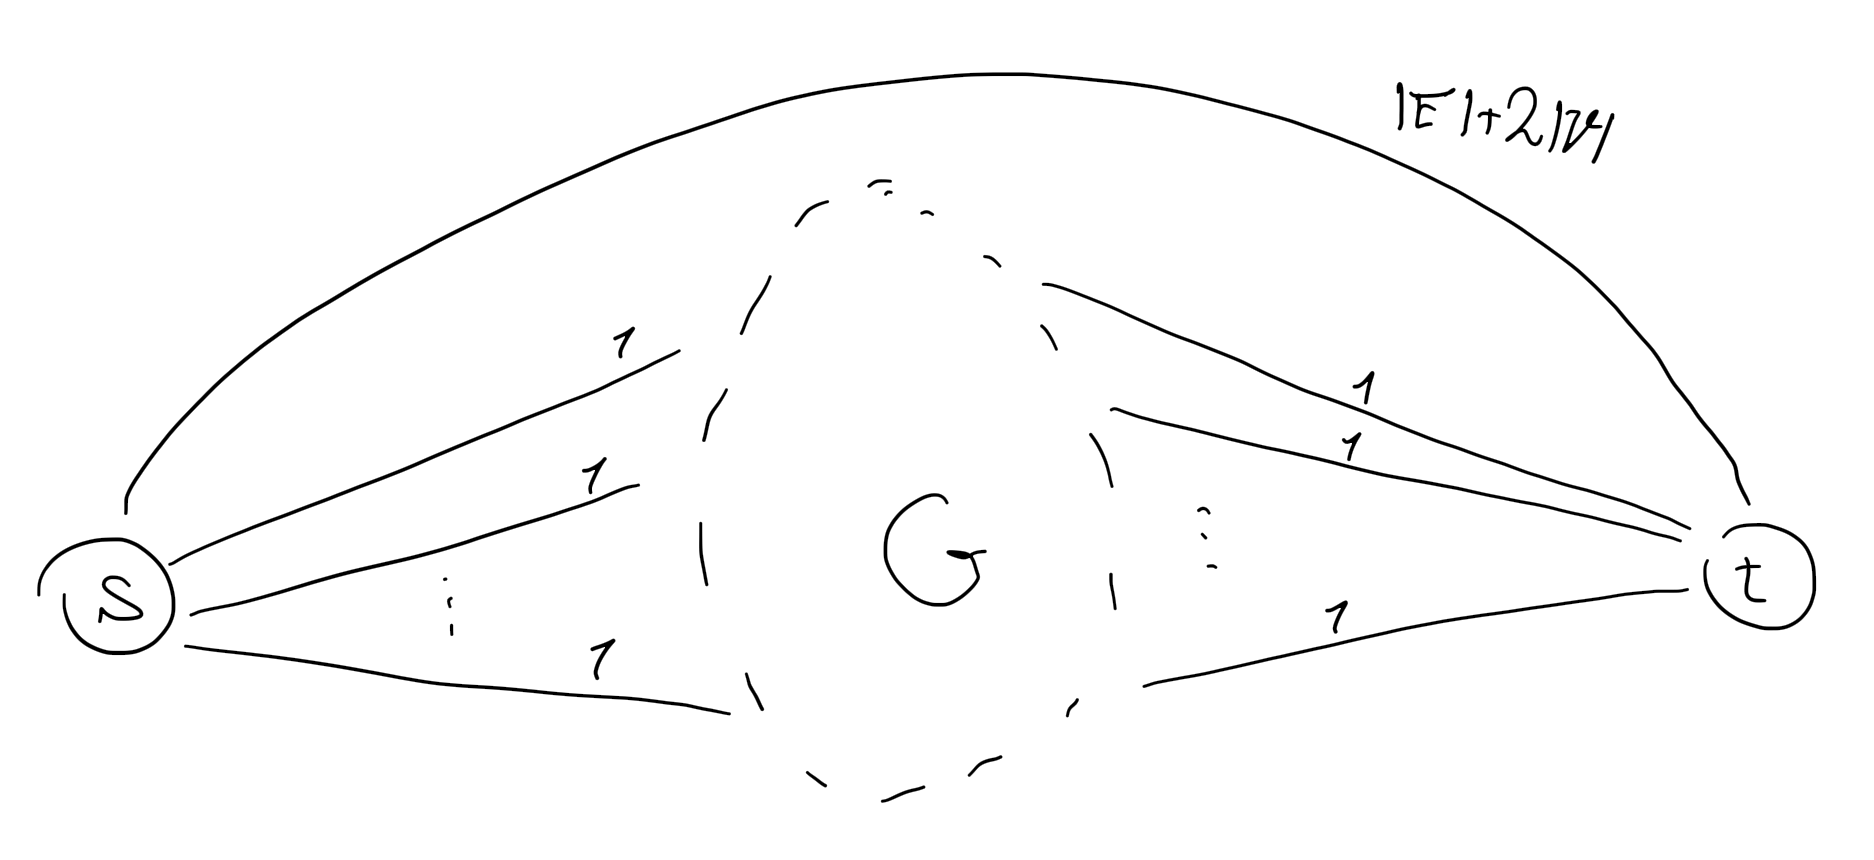

**Correctness:**
We claim that G has a Hamiltonian Path if and only if G' has a heavy
Hamiltonian Cycle. The total weight of the graph is |E| + 2|V| + 2|V| + |E| = 4|V| + 2|E|.
Hence, the weight of (s, t) dominates the weight of the possible Heavy Hamiltonian Cycle,
i.e., (s, t) must be included in a Heavy Hamiltonian Cycle. s can only be visited once, (s, t) is already used and there will be another edge (s, v) included in the cycle where v ∈ E. Similary for t. Because s and t are connected to every vertex in E respectively, the Hamiltonian Cycle
can be closed if and only there is a Hamiltonian Path in E.

**Complexity:**
We only need linear time to create two vertices and connect them with the
existing vertices. Hence the reduction takes polynomial time.
Heavy Hamiltonian cycle problem is in NP, because we can easily verify the answer by using a depth or breadth-first search to compute the total weight, and follow the cycle to compute the weight of the cycle. This takes linear time. In conclusion, Heavy Hamiltonian cycle problem is NP-complete.

# Question 7

Suppose you are given a magic black box that can solve the 3COLORABLE problem in polynomial time. That is, given an arbitrary graph G as input, the magic black box returns TRUE if G has a proper 3-coloring, and returns FALSE otherwise. Describe and analyze a polynomial-time algorithm that computes an actual proper 3-coloring of a given graph G, or correctly reports that no such coloring exists, using this magic black box as a subroutine. [Hint: The input to the black box is a graph. Just a graph. Nothing else.]

## Answer 7

Solution: For illustration purpose we name the three color as r, g, and b. Given G = (V, E), we first add a complete graph K₃ to G as a ‘color gadget’. Then, the three vertices in the gadget must be colored differently using the three colors. Without loss of generality we fix their colors and use the color as their names. We denote the augmented graph as G⁺. At first we use the black box to test if the original graph is 3-colorable. Return NONE if answer is NO. Next, for every vertices u in V, we try to link them with either pair of the vertices in the gadget and form a new graph, such that when performing coloring, u has to have the same color as the unselected vertex in the gadget. We then use the magic black box to test whether the new graph is 3-colorable.
If YES then we output the color of the vertex that is not connected to u in the gadget, and add these two edges into G⁺. Otherwise, we continue to test another pair. Let V(G) denote the vertex set of G and E(G) the edge set of G. The
black box is refered as 3COLORABLE(G). The pseudo code is given as follows:



```
3COLORING(G):
    if 3COLORABLE(G) is No:
        return None
    G+ <-- (V U {r, g, b}, E U {(r, g), (r, b), (g, b)})
    for each u in V:
        for each v in {r, g, b}:
            E' <-- E(G+) U {(u, r), (u, g), (u, b)}/{(u, v)}
            H <-- (V(G+), E')
            if 3COLORABLE(H) is Yes
                color[u] <-- color of v
                G+ <-- H
                break
    return color

```


An illustration is given as follows:

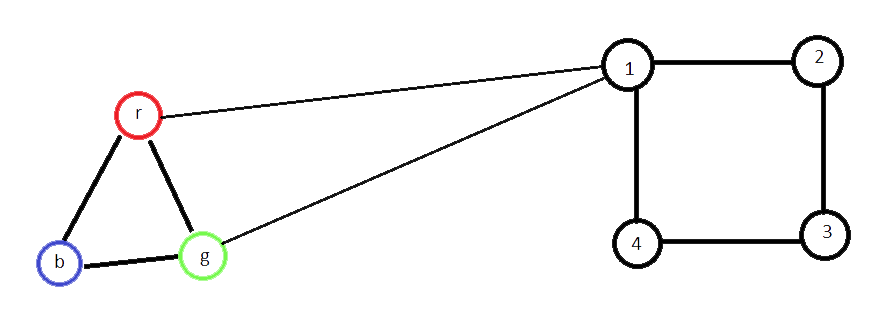

At first vertex 1 is connected to r and g, which means it should be colored to blue. Use the black box to test whether the new graph is 3-colorable.

**Correctness:** At each step of connecting a vertex to a pair of vertices in the color gadget, the color of this particular vertex is fixed. Suppose a proof of the problem is a permutation of colors rgbbgrrb... , essentially we are guessing the prefix of the proof, and verify it using the black box. This gurantees a correct answer.

**Complexity:** Let the time complexity of black box subroutine be f(n). At first there is call to the subroutine and some constant-time operations. The algorithm contains a for loop that will traverse the vertex set of given graph G. Inside the for loop at most three steps will be performed, which contains a call to the subroutine and some constant time operations. The time complexity will be O(f(n)) + z + 3n(y + O(f(n))), where z and y are some constants.
Hence, this algorithm is polynomial time.

# Question 8

Show that if every NP-hard language is also PSPACE-hard, then PSPACE = NP.

## Answer 8


The statement "if every NP-hard language is also PSPACE-hard, then PSPACE = NP" is an interesting theoretical proposition in the realm of computational complexity theory. To show this, we can use a logical argument based on the definitions of NP-hardness and PSPACE-hardness, and the relationships between these complexity classes.

1.  **Definitions:**
    *   **NP-hard:** A problem (or language) L is NP-hard if every problem in NP can be reduced to L in polynomial time. This means that L is at least as hard as the hardest problems in NP.
    *   **PSPACE-hard:** A problem L is PSPACE-hard if every problem in PSPACE can be reduced to L in polynomial time. This means that L is at least as hard as the hardest problems in PSPACE.

2.  **Assumption:** Assume that every NP-hard language is also PSPACE-hard.

3.  **Implication of the Assumption:** If every NP-hard language is also PSPACE-hard, it means that the hardest problems in NP are at least as hard as the hardest problems in PSPACE. In other words, the most difficult problems that can be verified in polynomial time (NP problems) are at least as hard as the most difficult problems that can be solved in polynomial space (PSPACE problems).

4.  **PSPACE is a Superset of NP:** It is known that NP is a subset of PSPACE. This is because any problem that can be solved in polynomial time with a non-deterministic Turing machine (an NP problem) can also be solved with a deterministic Turing machine using polynomial space.

5.  **Equality of NP and PSPACE under the Assumption:** Given that NP is a subset of PSPACE, and our assumption implies that the hardest problems in NP are as hard as the hardest problems in PSPACE, it follows that NP must be equal to PSPACE. This is because if the hardest problems in a subset (NP) are as hard as the hardest problems in the superset (PSPACE), then the subset and the superset are essentially the same in terms of computational complexity.

6.  **Conclusion:** Therefore, under the assumption that every NP-hard language is also PSPACE-hard, we conclude that NP is equal to PSPACE.

It's important to note that this is a theoretical exercise in computational complexity theory, and the actual relationship between NP and PSPACE is a major open question in computer science. The equality of NP and PSPACE would have profound implications for our understanding of computational problems and their complexities.

# Question 9

The Japanese game go-moku is played by two players, “X” and “O” on a 19×19 grid. Players take turns placing markers, and the first player to achieve five of her markers consecutively in a row, column, or diagonal is the winner. Consider this game generalized to an n×n board. Let

GM={ B | B is a position in generalized go-moku, where player “X” has a winning strategy}

By a position we mean a board with markers placed on it, such as may occur in the middle of a play of the game, together with an indication of which player moves next. Show that GM ∈ PSPACE.

## Answer 9

#### **Step 1:**

PSPACE: PSPACE is a deterministic Turing Machine that contains the class of languages that are decidable in polynomial space on a deterministic machine.

To generalize go-moku game on nxn board is given:

GM={ B | B is a position in generalized go-moku, where player “X” has a winning strategy}

*   This game is played by 2 players "X" and "O", now we have to prove that GM ∈ PSPACE.
*   Let's assume that B is written as a grid of "X" and "O" are empty, so the input is O(n^2).
*   Now Let's define a recursive algorithm to solve GM(B), which accepts if there is a winning strategy for play "X" starting at position B.

#### **Step 2:**

Recursive Algorithm of GM:

GM(B):
1.  Potential "X" moves: All spaces of i in position B without marker on them
    1.   Put an X marker on space i, next changing the position to B'. If there are 5Xs in a row (its the best move) then accept. If the board is now full, and no one has won, reject.
2.  Potential "O" moves: All spaces j in position B' without markers on them
    1.   Put an O marker on space j, next changing the position to B". If there are 5Os in a row (its also best move) or the board is full and no one has won, loop to next i (go to step 1.1). puting an X on i is obviously a bad move.
3.  Otherwise, run GM(B"):
    1.  If it accepts, loop to next j (go to step 3).
    2.  If it rejects, loop to the next i (go to step 1.1).
4.  If all j cause GM(B") to accept, i is a good X move, since it covers all possible O moves, so accept.

#### **Step 3:**

If no i causes accept, reject, there are no good moves from this position, so reject.

*   We can loop through all moves i, j at each step, since we can just reuse the space.
*   As we just need to store configurations B' and B", which takes only O(n^2) space.
*   And our recursion is only O(n^2) since there are at most n^2 moves.
*   Total space needed is O(n^4), which is a polynomial in the input length, since we assumed the input had length O(n^2).
*   So possible configurations following from B needs only polynomial space.
*   Thus GM ∈ PSPACE.

# Question 10

Two graphs are said to be isomorphic if one can be transformed into the other just by relabeling the vertices. For example, the graphs shown below are isomorphic; the left graph can be transformed into the right graph by the relabeling (1, 2, 3, 4, 5, 6, 7) → (c, g, b, e, a, f, d)

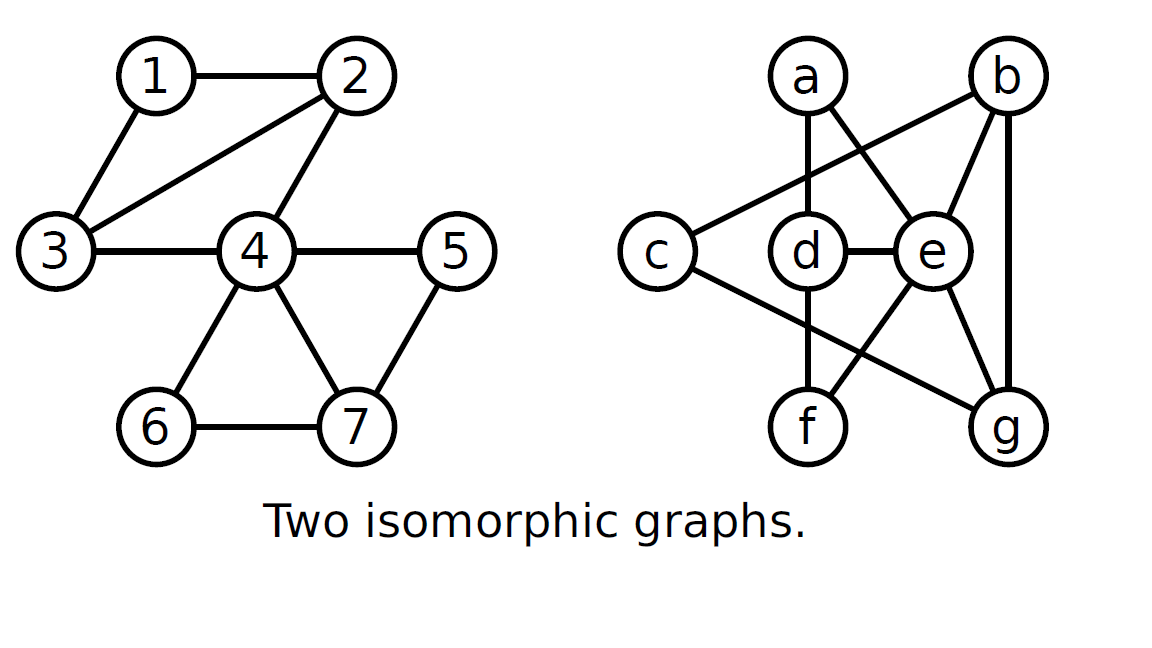

Consider the following related decision problems:
*   GRAPHISOMORPHISM: Given two graphs G and H, determine whether G and H are isomorphic.
*   EVENGRAPHISOMORPHISM: Given two graphs G and H, such that every vertex in G and H has even degree, determine whether G and H are isomorphic.
*   SUBGRAPHISOMORPHISM: Given two graphs G and H, determine whether G is isomorphic to a subgraph of H.


(a) Describe a polynomial-time reduction from EVENGRAPHISOMORPHISM to GRAPHISOMORPHISM.

(b) Describe a polynomial-time reduction from GRAPHISOMORPHISM to EVENGRAPHISOMORPHISM.

(c) Describe a polynomial-time reduction from GRAPHISOMORPHISM to SUBGRAPHISOMORPHISM.

(d) Prove that SUBGRAPHISOMORPHISM is NP-complete.


## Answer 10

### Part a.  Describe a polynomial-time reduction from EVENGRAPHISOMORPHISM to GRAPHISOMORPHISM.

EVENGRAPHISOMORPHISM is a special case of GRAPHISOMORPHISM. We can perform
an identical reduction from EVENGRAPHISOMORPHISM to GRAPHISOMORPHISM. That is, given two graphs G and H in which every vertex has even degree, let G' = G and H' = H. Then, G and H are isomorphic if and only if G' and H' are isomorphic. This copy just takes O(n) time and is thus polynomial.

### Part b. Describe a polynomial-time reduction from GRAPHISOMORPHISM to EVENGRAPHISOMORPHISM.

Given a graph G, we can transform it into an even graph by adding a dummy
vertex between each pair of vertices that share an edge, and connect this vertex with the two vertices, respectively. For example, we can transform the graphs G and H as follows:

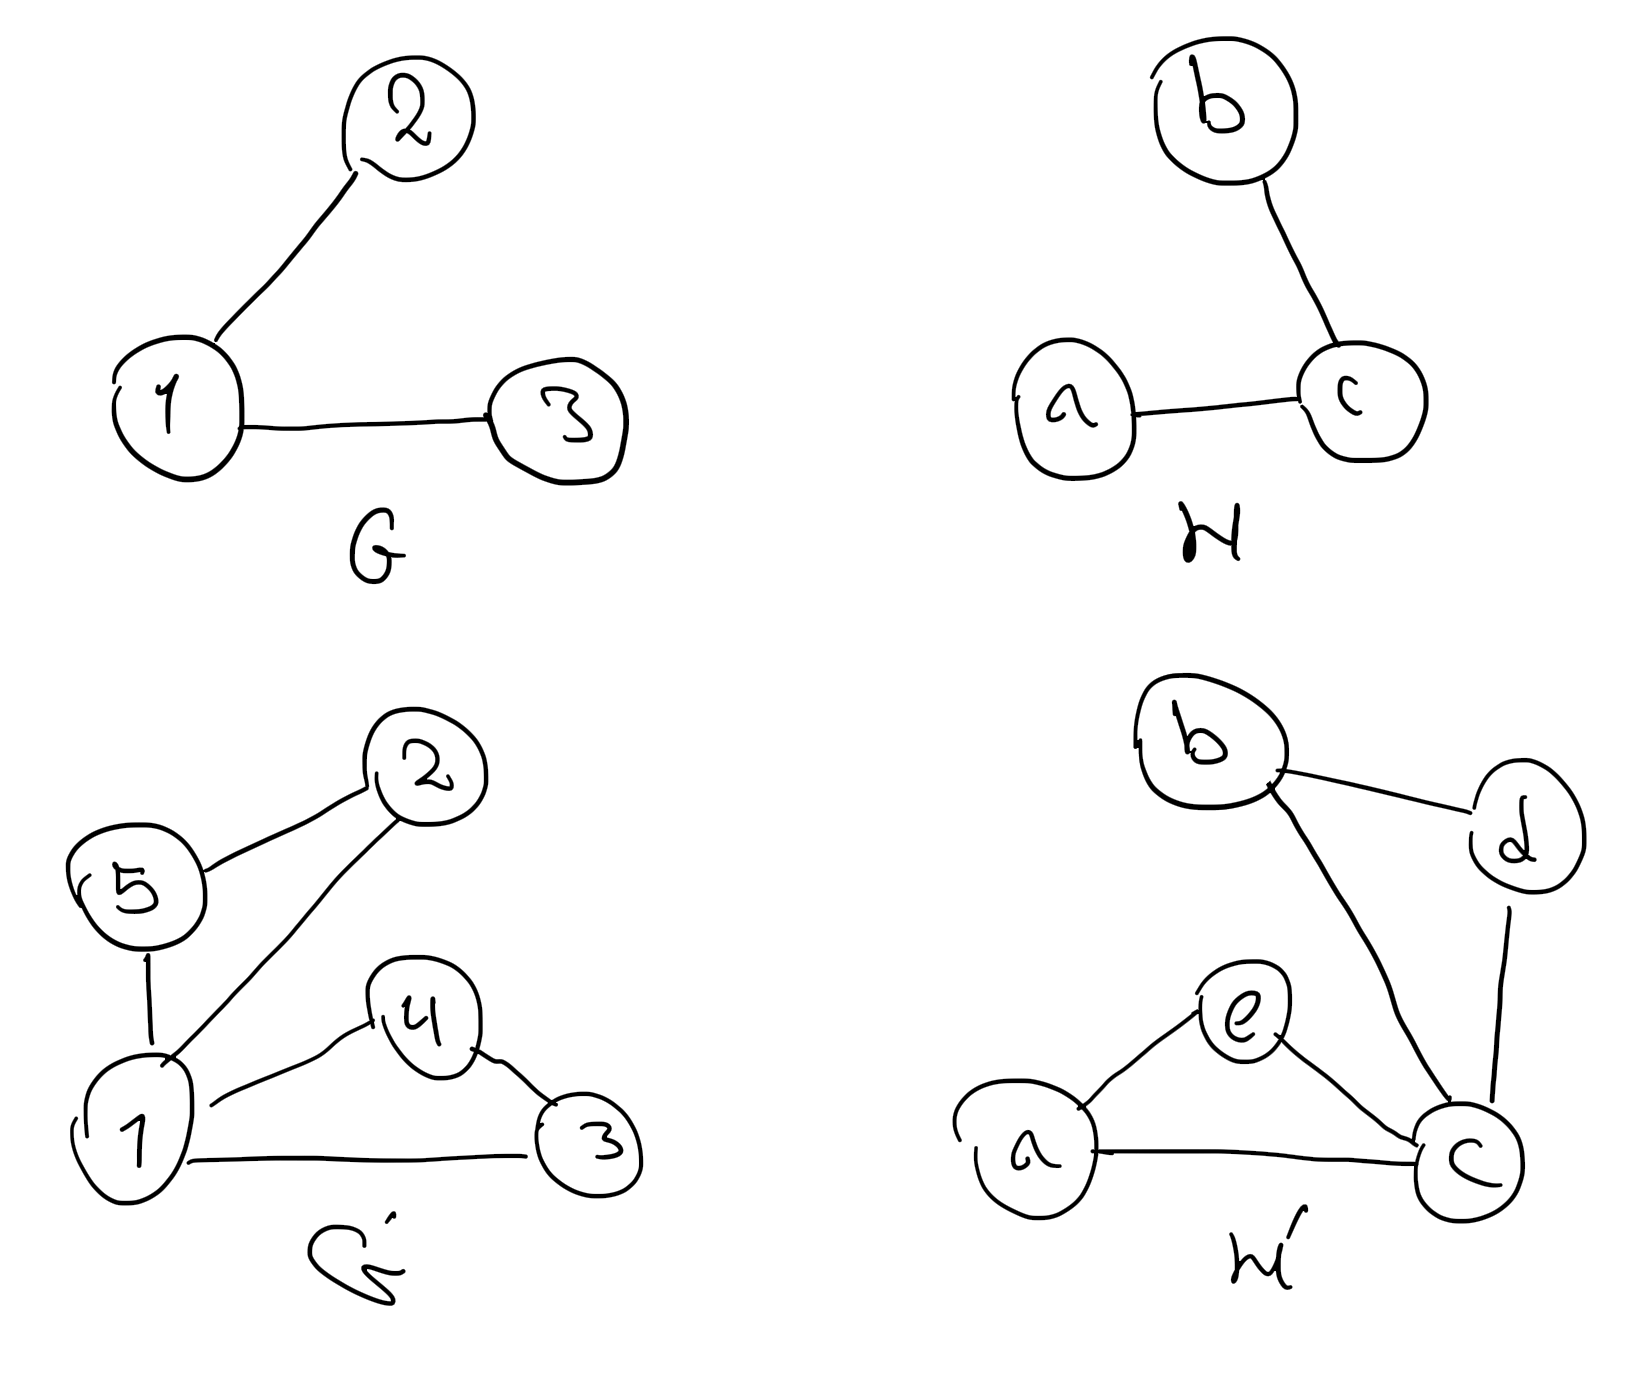

From graph G to G', vertices 5 and 4 are added between vertices 1 and 2, 1 and 3, respectively. From graph H to H', vertices d and e are added between vertices b and c, c and a, respectively. The degree of vertices are all even after the transformation. Given a relabeling of G and H, we can get a relabeling for G' and H' by appending the labeling of the added vertices to the original labeling. Given a relabeling of the even graphs, we can get a relabeling for the original graphs by ignoring the dummy vertices. Hence, G and H are isomorphic if and only if G' and H' are isomorphic. There are O(|V|) edges to process and thus the reduction is polynomial-time.

### Part c. Describe a polynomial-time reduction from GRAPHISOMORPHISM to SUBGRAPHISOMORPHISM.

GRAPHISOMORPHISM is a speicial case of SUBGRAPHISOMORPHISM. Given G and H, if
they do not have the same number of vertices and edges, of course they are not the isomorphic. We perform an identical reduction from GRAPHISOMORPHISM to SUBGRAPHISOMORPHISM. Let G' = G and H' = H. Then, G and H are isomorphic if and only if G' and H' are isomorphic and have the same number of vertices and edges. This reduction is polynomial as shown before.

### Part d. Prove that SUBGRAPHISOMORPHISM is NP-complete.

We prove SUBGRAPHISOMORPHISM is NP-hard by showing a polynomial time reduction
from Hamiltonian Cycle problem.

Given a graph H, we generate another graph G such that G is a cycle and has the same number of vertices as H. If G is isomorphic to a subgraph of H, then H has a hamiltonian cycle, which is just the isomorphic subgraph. Conversely, if H has a hamiltonian cycle, G will be isomorphic to the cycle, which is a subgraph of H. This transformation takes O(n) time. Hence, SUBGRAPHISOMORPHISM is NP-hard.

Given a proof of subgraph isomorphism, i.e., a relabeling of a graph G to a subgraph of H, we apply the relabeling to H. Suppose we use adjacency list to represent the graph, then we need at most O(n^2) time to check if the relabeling is correct. The check can be done in polynomial time and thus SUBGRAPHISOMORPHISM in NP. In conclusion, SUBGRAPHISOMORPHISM is NP-complete.
